<a href="https://colab.research.google.com/github/FarahLebdeh/Mobiclinic/blob/main/Copy_of_Graduation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect Google Colab with Google Drive**

In [ ]:
from google.colab import drive
from os.path import join
drive.mount('/content/drive')

Mounted at /content/drive



# **Import Libraries**

In [ ]:
import os
import glob
import re
import csv
import numpy
import numpy as np
from re import match
import scipy.stats as st
import pandas as pd 
import random
import numpy as np 
import nltk
import string
import statistics
from joblib import dump, load
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from scipy.stats import entropy
from collections import Counter
from scipy import stats
from oauth2client.client import GoogleCredentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# **Read Text File**

**Print content of the files then save all the data in one text file "Output.txt"**

In [ ]:
count = 0
for filename in os.listdir("/content/drive/MyDrive/Colab Notebooks/All Data without 11/All Data"):
   with open(os.path.join("/content/drive/MyDrive/Colab Notebooks/All Data without 11/All Data", filename), 'r') as f:
       text = f.read()
      #  to p"rint content
       #print(text)
       count += 1
       print(str(count)+" "+filename+" "+text)
        # save name of file and content      
      #  print(text , file=open("/content/drive/MyDrive/Colab Notebooks/Output/data/result.txt", "a"))

1 1_2_1_22_160_47_1.txt 02:32|1,0,0,0,-3,2,1,0,0,2,-3,0,1,0,0,1,-3,0,1,0,0,1,-3,0,1,0,0,0,-4,0,1,1,0,0,-4,1 02:32|1,0,0,0,-2,1,1,0,0,0,-2,0,1,0,0,0,-2,0,1,0,0,-7,-2,0,1,0,0,-2,-4,-2,1,1,0,-2,-5,0 02:32|1,0,0,3,-3,0,1,0,0,0,-2,0,1,0,0,0,-2,0,1,0,0,-6,-2,2,1,0,0,-2,-2,-4,1,1,0,-6,-9,2 02:32|1,0,0,3,-4,0,1,0,0,-1,-2,-1,1,0,0,-1,-2,-1,1,0,0,-6,-3,0,1,0,0,0,-3,-2,1,1,0,-1,-9,3 02:32|1,0,0,11,-3,-2,1,0,0,0,-3,-3,1,0,0,-1,-3,-4,1,0,0,-12,-3,2,1,0,0,6,10,-12,1,1,0,1,-23,8 02:32|1,0,0,15,-13,-30,1,0,0,4,-6,-33,1,0,0,3,-7,-38,1,0,0,-13,-7,-39,1,0,0,16,13,-41,1,1,0,7,-33,16 02:32|1,0,0,24,-17,-53,1,0,0,-5,-5,-32,1,0,0,-2,-10,-33,1,0,0,-22,-26,-43,1,0,0,0,15,-33,1,1,-1,0,-32,0 02:33|1,0,0,17,-13,-30,1,0,0,0,-2,-24,1,0,0,3,-1,-23,1,0,0,0,0,-29,0,0,0,1,0,-21,1,1,0,1,-2,-18 02:33|1,0,0,9,0,-14,1,0,0,-6,0,-11,1,0,0,-6,-1,-10,1,0,0,-12,-2,-14,0,0,0,0,-2,-9,1,1,-1,-2,0,-6 02:33|1,0,0,0,-4,11,1,0,0,10,-2,1,1,0,0,1,-2,6,1,0,0,-14,2,10,0,0,0,0,-29,2,1,0,0,0,6,23 02:33|1,0,0,2,6,29,1,0,0,24,-6,32,1,0,0,14,-

In [ ]:
exName = []
for filename in os.listdir("/content/drive/MyDrive/Colab Notebooks/All Data without 11/All Data"):
   with open(os.path.join("/content/drive/MyDrive/Colab Notebooks/All Data without 11/All Data", filename), 'r') as f:
    #  print(filename)
     x = filename.split("_")
     exName.append(x[2])


**Remove Time From Files**

In [ ]:
# example1 = "/content/drive/MyDrive/Colab Notebooks/Output/data/result.txt"
# file1 = open(example1, "r")
# Lines = file1.readlines()
# listfile = []
# content2_list = []
# count = 0

# with open("/content/drive/MyDrive/Colab Notebooks/Output/data/result.txt") as f:
#     lines = f.read()
#     content_list = lines.splitlines()
    
# for line in content_list:
#   splitted_lines = line.split(' ')
#  # print(splitted_lines)
#   for line1 in splitted_lines:
#    listfile.append(line1[6:])
#   listfile.append('\n')

# file2 = open("/content/drive/MyDrive/Colab Notebooks/Output/data/new_result1.txt", 'w')
# for line in listfile:
#   file2.write(line)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Output/data/new_result.csv', mode ='r')as file:
  # reading the CSV file
  csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file
  for lines in csvFile:
        # print(lines)
        lines.append(0)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/test1.csv')
# print(df.to_string())
df.head(130)
# df.info()

,Ax1,Ay1,Az1,Gx1,Gy1,Gz1,Ax2,Ay2,Az2,Gx2,...,Az239,Gx239,Gy239,Gz239,Ax240,Ay240,Az240,Gx240,Gy240,Gz240
0,1,0,0,0,-3,2,1,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,5,-3,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,0,-14,-1,-6,1,0,0,-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,0,1,-4,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,-8,-7,0,1,0,0,-7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,0,2,0,89,1,0,0,-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,0,0,0,8,9,16,1,0,0,-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,1,0,0,0,1,0,1,0,0,-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,1,-1,0,9,-72,-120,1,-1,0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Add Zero's row**

In [ ]:
#@title
# row= ['0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']
row={'Ax1':[0],'Ay1':[0],'Az1':[0],'Gx1':[0],'Gy1':[0],'Gz1':[0],'Ax2':[0],'Ay2':[0],'Az2':[0],'Gx2':[0],'Gy2':[0],'Gz2':[0],'Ax3':[0],'Ay3':[0],'Az3':[0],'Gx3':[0],'Gy3':[0],'Gz3':[0],'Ax4':[0],'Ay4':[0],'Az4':[0],'Gx4':[0],'Gy4':[0],'Gz4':[0],'Ax5':[0],'Ay5':[0],'Az5':[0],'Gx5':[0],'Gy5':[0],'Gz5':[0],'Ax6':[0],'Ay6':[0],'Az6':[0],'Gx6':[0],'Gy6':[0],'Gz6':[0],'Ax7':[0],'Ay7':[0],'Az7':[0],'Gx7':[0],'Gy7':[0],'Gz7':[0],'Ax8':[0],'Ay8':[0],'Az8':[0],'Gx8':[0],'Gy8':[0],'Gz8':[0],'Ax9':[0],'Ay9':[0],'Az9':[0],'Gx9':[0],'Gy9':[0],'Gz9':[0],'Ax10':[0],'Ay10':[0],'Az10':[0],'Gx10':[0],'Gy10':[0],'Gz10':[0],'Ax11':[0],'Ay11':[0],'Az11':[0],'Gx11':[0],'Gy11':[0],'Gz11':[0],'Ax12':[0],'Ay12':[0],'Az12':[0],'Gx12':[0],'Gy12':[0],'Gz12':[0],'Ax13':[0],'Ay13':[0],'Az13':[0],'Gx13':[0],'Gy13':[0],'Gz13':[0],'Ax14':[0],'Ay14':[0],'Az14':[0],'Gx14':[0],'Gy14':[0],'Gz14':[0],'Ax15':[0],'Ay15':[0],'Az15':[0],'Gx15':[0],'Gy15':[0],'Gz15':[0],'Ax16':[0],'Ay16':[0],'Az16':[0],'Gx16':[0],'Gy16':[0],'Gz16':[0],'Ax17':[0],'Ay17':[0],'Az17':[0],'Gx17':[0],'Gy17':[0],'Gz17':[0],'Ax18':[0],'Ay18':[0],'Az18':[0],'Gx18':[0],'Gy18':[0],'Gz18':[0],'Ax19':[0],'Ay19':[0],'Az19':[0],'Gx19':[0],'Gy19':[0],'Gz19':[0],'Ax20':[0],'Ay20':[0],'Az20':[0],'Gx20':[0],'Gy20':[0],'Gz20':[0],'Ax21':[0],'Ay21':[0],'Az21':[0],'Gx21':[0],'Gy21':[0],'Gz21':[0],'Ax22':[0],'Ay22':[0],'Az22':[0],'Gx22':[0],'Gy22':[0],'Gz22':[0],'Ax23':[0],'Ay23':[0],'Az23':[0],'Gx23':[0],'Gy23':[0],'Gz23':[0],'Ax24':[0],'Ay24':[0],'Az24':[0],'Gx24':[0],'Gy24':[0],'Gz24':[0],'Ax25':[0],'Ay25':[0],'Az25':[0],'Gx25':[0],'Gy25':[0],'Gz25':[0],'Ax26':[0],'Ay26':[0],'Az26':[0],'Gx26':[0],'Gy26':[0],'Gz26':[0],'Ax27':[0],'Ay27':[0],'Az27':[0],'Gx27':[0],'Gy27':[0],'Gz27':[0],'Ax28':[0],'Ay28':[0],'Az28':[0],'Gx28':[0],'Gy28':[0],'Gz28':[0],'Ax29':[0],'Ay29':[0],'Az29':[0],'Gx29':[0],'Gy29':[0],'Gz29':[0],'Ax30':[0],'Ay30':[0],'Az30':[0],'Gx30':[0],'Gy30':[0],'Gz30':[0],'Ax31':[0],'Ay31':[0],'Az31':[0],'Gx31':[0],'Gy31':[0],'Gz31':[0],'Ax32':[0],'Ay32':[0],'Az32':[0],'Gx32':[0],'Gy32':[0],'Gz32':[0],'Ax33':[0],'Ay33':[0],'Az33':[0],'Gx33':[0],'Gy33':[0],'Gz33':[0],'Ax34':[0],'Ay34':[0],'Az34':[0],'Gx34':[0],'Gy34':[0],'Gz34':[0],'Ax35':[0],'Ay35':[0],'Az35':[0],'Gx35':[0],'Gy35':[0],'Gz35':[0],'Ax36':[0],'Ay36':[0],'Az36':[0],'Gx36':[0],'Gy36':[0],'Gz36':[0],'Ax37':[0],'Ay37':[0],'Az37':[0],'Gx37,Gy37':[0],'Gz37':[0],'Ax38':[0],'Ay38':[0],'Az38':[0],'Gx38':[0],'Gy38':[0],'Gz38':[0],'Ax39':[0],'Ay39':[0],'Az39':[0],'Gx39':[0],'Gy39':[0],'Gz39':[0],'Ax40':[0],'Ay40':[0],'Az40':[0],'Gx40':[0],'Gy40':[0],'Gz40':[0],'Ax41':[0],'Ay41':[0],'Az41':[0],'Gx41':[0],'Gy41':[0],'Gz41':[0],'Ax42':[0],'Ay42':[0],'Az42':[0],'Gx42':[0],'Gy42':[0],'Gz42':[0],'Ax43':[0],'Ay43':[0],'Az43':[0],'Gx43':[0],'Gy43':[0],'Gz43':[0],'Ax44':[0],'Ay44':[0],'Az44':[0],'Gx44':[0],'Gy44':[0],'Gz44':[0],'Ax45':[0],'Ay45':[0],'Az45':[0],'Gx45':[0],'Gy45':[0],'Gz45':[0],'Ax46':[0],'Ay46':[0],'Az46':[0],'Gx46':[0],'Gy46':[0],'Gz46':[0],'Ax47':[0],'Ay47':[0],'Az47':[0],'Gx47':[0],'Gy47':[0],'Gz47':[0],'Ax48':[0],'Ay48':[0],'Az48':[0],'Gx48':[0],'Gy48':[0],'Gz48':[0],'Ax49':[0],'Ay49':[0],'Az49':[0],'Gx49':[0],'Gy49':[0],'Gz49':[0],'Ax50':[0],'Ay50':[0],'Az50':[0],'Gx50':[0],'Gy50':[0],'Gz50':[0],'Ax51':[0],'Ay51':[0],'Az51':[0],'Gx51':[0],'Gy51':[0],'Gz51':[0],'Ax52':[0],'Ay52':[0],'Az52':[0],'Gx52':[0],'Gy52':[0],'Gz52':[0],'Ax53':[0],'Ay53':[0],'Az53':[0],'Gx53':[0],'Gy53':[0],'Gz53':[0],'Ax54':[0],'Ay54':[0],'Az54':[0],'Gx54':[0],'Gy54':[0],'Gz54':[0],'Ax55':[0],'Ay55':[0],'Az55':[0],'Gx55':[0],'Gy55':[0],'Gz55':[0],'Ax56':[0],'Ay56':[0],'Az56':[0],'Gx56':[0],'Gy56':[0],'Gz56':[0],'Ax57':[0],'Ay57':[0],'Az57':[0],'Gx57':[0],'Gy57':[0],'Gz57':[0],'Ax58':[0],'Ay58':[0],'Az58':[0],'Gx58':[0],'Gy58':[0],'Gz58':[0],'Ax59':[0],'Ay59':[0],'Az59':[0],'Gx59':[0],'Gy59':[0],'Gz59':[0],'Ax60':[0],'Ay60':[0],'Az60':[0],'Gx60':[0],'Gy60':[0],'Gz60':[0],'Ax61':[0],'Ay61':[0],'Az61':[0],'Gx61':[0],'Gy61':[0],'Gz61':[0],'Ax62':[0],'Ay62':[0],'Az62':[0],'Gx62':[0],'Gy62':[0],'Gz62':[0],'Ax63':[0],'Ay63':[0],'Az63':[0],'Gx63':[0],'Gy63':[0],'Gz63':[0],'Ax64':[0],'Ay64':[0],'Az64':[0],'Gx64':[0],'Gy64':[0],'Gz64':[0],'Ax65':[0],'Ay65':[0],'Az65':[0],'Gx65':[0],'Gy65':[0],'Gz65':[0],'Ax66':[0],'Ay66':[0],'Az66':[0],'Gx66':[0],'Gy66':[0],'Gz66':[0],'Ax67':[0],'Ay67':[0],'Az67':[0],'Gx67':[0],'Gy67':[0],'Gz67':[0],'Ax68':[0],'Ay68':[0],'Az68':[0],'Gx68':[0],'Gy68':[0],'Gz68':[0],'Ax69':[0],'Ay69':[0],'Az69':[0],'Gx69':[0],'Gy69':[0],'Gz69':[0],'Ax70':[0],'Ay70':[0],'Az70':[0],'Gx70':[0],'Gy70':[0],'Gz70':[0],'Ax71':[0],'Ay71':[0],'Az71':[0],'Gx71':[0],'Gy71':[0],'Gz71':[0],'Ax72':[0],'Ay72':[0],'Az72':[0],'Gx72':[0],'Gy72':[0],'Gz72':[0],'Ax73':[0],'Ay73':[0],'Az73':[0],'Gx73':[0],'Gy73':[0],'Gz73':[0],'Ax74':[0],'Ay74':[0],'Az74':[0],'Gx74':[0],'Gy74':[0],'Gz74':[0],'Ax75':[0],'Ay75':[0],'Az75':[0],'Gx75':[0],'Gy75':[0],'Gz75':[0],'Ax76':[0],'Ay76':[0],'Az76':[0],'Gx76':[0],'Gy76':[0],'Gz76':[0],'Ax77':[0],'Ay77':[0],'Az77':[0],'Gx77':[0],'Gy77':[0],'Gz77':[0],'Ax78':[0],'Ay78':[0],'Az78':[0],'Gx78':[0],'Gy78':[0],'Gz78':[0],'Ax79':[0],'Ay79':[0],'Az79':[0],'Gx79':[0],'Gy79':[0],'Gz79':[0],'Ax80':[0],'Ay80':[0],'Az80':[0],'Gx80':[0],'Gy80':[0],'Gz80':[0],'Ax81':[0],'Ay81':[0],'Az81':[0],'Gx81':[0],'Gy81':[0],'Gz81':[0],'Ax82':[0],'Ay82':[0],'Az82':[0],'Gx82':[0],'Gy82':[0],'Gz82':[0],'Ax83':[0],'Ay83':[0],'Az83':[0],'Gx83':[0],'Gy83':[0],'Gz83':[0],'Ax84':[0],'Ay84':[0],'Az84':[0],'Gx84':[0],'Gy84':[0],'Gz84':[0],'Ax85':[0],'Ay85':[0],'Az85':[0],'Gx85':[0],'Gy85':[0],'Gz85':[0],'Ax86':[0],'Ay86':[0],'Az86':[0],'Gx86':[0],'Gy86':[0],'Gz86':[0],'Ax87':[0],'Ay87':[0],'Az87':[0],'Gx87':[0],'Gy87':[0],'Gz87':[0],'Ax88':[0],'Ay88':[0],'Az88':[0],'Gx88':[0],'Gy88':[0],'Gz88':[0],'Ax89':[0],'Ay89':[0],'Az89':[0],'Gx89':[0],'Gy89':[0],'Gz89':[0],'Ax90':[0],'Ay90':[0],'Az90':[0],'Gx90':[0],'Gy90':[0],'Gz90':[0],'Ax91':[0],'Ay91':[0],'Az91':[0],'Gx91':[0],'Gy91':[0],'Gz91':[0],'Ax92':[0],'Ay92':[0],'Az92':[0],'Gx92':[0],'Gy92':[0],'Gz92':[0],'Ax93':[0],'Ay93':[0],'Az93':[0],'Gx93':[0],'Gy93':[0],'Gz93':[0],'Ax94':[0],'Ay94':[0],'Az94':[0],'Gx94':[0],'Gy94':[0],'Gz94':[0],'Ax95':[0],'Ay95':[0],'Az95':[0],'Gx95':[0],'Gy95':[0],'Gz95':[0],'Ax96':[0],'Ay96':[0],'Az96':[0],'Gx96':[0],'Gy96':[0],'Gz96':[0],'Ax97':[0],'Ay97':[0],'Az97':[0],'Gx97':[0],'Gy97':[0],'Gz97':[0],'Ax98':[0],'Ay98':[0],'Az98':[0],'Gx98':[0],'Gy98':[0],'Gz98':[0],'Ax99':[0],'Ay99':[0],'Az99':[0],'Gx99':[0],'Gy99':[0],'Gz99':[0],'Ax100':[0],'Ay100':[0],'Az100':[0],'Gx100':[0],'Gy100':[0],'Gz100':[0],'Ax101':[0],'Ay101':[0],'Az101':[0],'Gx101':[0],'Gy101':[0],'Gz101':[0],'Ax102':[0],'Ay102':[0],'Az102':[0],'Gx102':[0],'Gy102':[0],'Gz102':[0],'Ax103':[0],'Ay103':[0],'Az103':[0],'Gx103':[0],'Gy103':[0],'Gz103':[0],'Ax104':[0],'Ay104':[0],'Az104':[0],'Gx104':[0],'Gy104':[0],'Gz104':[0],'Ax105':[0],'Ay105':[0],'Az105':[0],'Gx105':[0],'Gy105':[0],'Gz105':[0],'Ax106':[0],'Ay106':[0],'Az106':[0],'Gx106':[0],'Gy106':[0],'Gz106':[0],'Ax107':[0],'Ay107':[0],'Az107':[0],'Gx107':[0],'Gy107':[0],'Gz107':[0],'Ax108':[0],'Ay108':[0],'Az108':[0],'Gx108':[0],'Gy108':[0],'Gz108':[0],'Ax109':[0],'Ay109':[0],'Az109':[0],'Gx109':[0],'Gy109':[0],'Gz109':[0],'Ax110':[0],'Ay110':[0],'Az110':[0],'Gx110':[0],'Gy110':[0],'Gz110':[0],'Ax111':[0],'Ay111':[0],'Az111':[0],'Gx111':[0],'Gy111':[0],'Gz111':[0],'Ax112':[0],'Ay112':[0],'Az112':[0],'Gx112':[0],'Gy112':[0],'Gz112':[0],'Ax113':[0],'Ay113':[0],'Az113':[0],'Gx113':[0],'Gy113':[0],'Gz113':[0],'Ax114':[0],'Ay114':[0],'Az114':[0],'Gx114':[0],'Gy114':[0],'Gz114':[0],'Ax115':[0],'Ay115':[0],'Az115':[0],'Gx115':[0],'Gy115':[0],'Gz115':[0],'Ax116':[0],'Ay116':[0],'Az116':[0],'Gx116':[0],'Gy116':[0],'Gz116':[0],'Ax117':[0],'Ay117':[0],'Az117':[0],'Gx117':[0],'Gy117':[0],'Gz117':[0],'Ax118':[0],'Ay118':[0],'Az118':[0],'Gx118':[0],'Gy118':[0],'Gz118':[0],'Ax119':[0],'Ay119':[0],'Az119':[0],'Gx119':[0],'Gy119':[0],'Gz119':[0],'Ax120':[0],'Ay120':[0],'Az120':[0],'Gx120':[0],'Gy120':[0],'Gz120':[0],'Ax121':[0],'Ay121':[0],'Az121':[0],'Gx121':[0],'Gy121':[0],'Gz121':[0],'Ax122':[0],'Ay122':[0],'Az122':[0],'Gx122':[0],'Gy122':[0],'Gz122':[0],'Ax123':[0],'Ay123':[0],'Az123':[0],'Gx123':[0],'Gy123':[0],'Gz123':[0],'Ax124':[0],'Ay124':[0],'Az124':[0],'Gx124':[0],'Gy124':[0],'Gz124':[0],'Ax125':[0],'Ay125':[0],'Az125':[0],'Gx125':[0],'Gy125':[0],'Gz125':[0],'Ax126':[0],'Ay126':[0],'Az126':[0],'Gx126':[0],'Gy126':[0],'Gz126':[0],'Ax127':[0],'Ay127':[0],'Az127':[0],'Gx127':[0],'Gy127':[0],'Gz127':[0],'Ax128':[0],'Ay128':[0],'Az128':[0],'Gx128':[0],'Gy128':[0],'Gz128':[0],'Ax129':[0],'Ay129':[0],'Az129':[0],'Gx129':[0],'Gy129':[0],'Gz129':[0],'Ax130':[0],'Ay230':[0],'Az130':[0],'Gx130':[0],'Gy130':[0],'Gz130':[0],'Ax131':[0],'Ay131':[0],'Az131':[0],'Gx131':[0],'Gy131':[0],'Gz131':[0],'Ax132':[0],'Ay132':[0],'Az132':[0],'Gx132':[0],'Gy132':[0],'Gz132':[0],'Ax133':[0],'Ay133':[0],'Az133':[0],'Gx133':[0],'Gy133':[0],'Gz133':[0],'Ax134':[0],'Ay134':[0],'Az134':[0],'Gx134':[0],'Gy134':[0],'Gz134':[0],'Ax135':[0],'Ay135':[0],'Az135':[0],'Gx135':[0],'Gy135':[0],'Gz135':[0],'Ax136':[0],'Ay136':[0],'Az136':[0],'Gx136':[0],'Gy136':[0],'Gz136':[0],'Ax137':[0],'Ay137':[0],'Az137':[0],'Gx137':[0],'Gy137':[0],'Gz137':[0],'Ax138':[0],'Ay138':[0],'Az138':[0],'Gx138':[0],'Gy138':[0],'Gz138':[0],'Ax139':[0],'Ay139':[0],'Az139':[0],'Gx139':[0],'Gy139':[0],'Gz139':[0],'Ax140':[0],'Ay140':[0],'Ax141':[0],'Ay141':[0],'Az141':[0],'Gx141':[0],'Gy141':[0],'Gz141':[0],'Ax142':[0],'Ay142':[0],'Az142':[0],'Gx142':[0],'Gy142':[0],'Gz142':[0],'Ax143':[0],'Ay143':[0],'Az143':[0],'Gx143':[0],'Gy143':[0],'Gz143':[0],'Ax144':[0],'Ay144':[0],'Az144':[0],'Gx144':[0],'Gy144':[0],'Gz144':[0],'Ax145':[0],'Ay145':[0],'Az145':[0],'Gx145':[0],'Gy145':[0],'Gz145':[0],'Ax146':[0],'Ay146':[0],'Az146':[0],'Gx146':[0],'Gy146':[0],'Gz146':[0],'Ax147':[0],'Ay147':[0],'Az147':[0],'Gx147':[0],'Gy147':[0],'Gz147':[0],'Ax148':[0],'Ay148':[0],'Az148':[0],'Gx148':[0],'Gy148':[0],'Gz148':[0],'Ax149':[0],'Ay149':[0],'Az149':[0],'Gx149':[0],'Gy149':[0],'Gz149':[0],'Ax150':[0],'Ay150':[0],'Az150':[0],'Gx150':[0],'Gy150':[0],'Gz150':[0],'Ax151':[0],'Ay151':[0],'Az151':[0],'Gx151':[0],'Gy151':[0],'Gz151':[0],'Ax152':[0],'Ay152':[0],'Az152':[0],'Gx152':[0],'Gy152':[0],'Gz152':[0],'Ax153':[0],'Ay153':[0],'Az153':[0],'Gx153':[0],'Gy153':[0],'Gz153':[0],'Ax154':[0],'Ay154':[0],'Az154':[0],'Gx154':[0],'Gy154':[0],'Gz154':[0],'Ax155':[0],'Ay155':[0],'Az155':[0],'Gx155':[0],'Gy155':[0],'Gz155':[0],'Ax156':[0],'Ay156':[0],'Az156':[0],'Gx156':[0],'Gy156':[0],'Gz156':[0],'Ax157':[0],'Ay157':[0],'Az157':[0],'Gx157':[0],'Gy157':[0],'Gz157':[0],'Ax158':[0],'Ay158':[0],'Az158':[0],'Gx158':[0],'Gy158':[0],'Gz158':[0],'Ax159':[0],'Ay159':[0],'Az159':[0],'Gx159':[0],'Gy159':[0],'Gz159':[0],'Ax160':[0],'Ay160':[0],'Az160':[0],'Gx160':[0],'Gy160':[0],'Gz160':[0],'Ax161':[0],'Ay161':[0],'Az161':[0],'Gx161':[0],'Gy161':[0],'Gz161':[0],'Ax162':[0],'Ay162':[0],'Az162':[0],'Gx162':[0],'Gy162':[0],'Gz162':[0],'Ax163':[0],'Ay163':[0],'Az163':[0],'Gx163':[0],'Gy163':[0],'Gz163':[0],'Ax164':[0],'Ay164':[0],'Az164':[0],'Gx164':[0],'Gy164':[0],'Gz164':[0],'Ax165':[0],'Ay165':[0],'Az165':[0],'Gx165':[0],'Gy165':[0],'Gz165':[0],'Ax166':[0],'Ay166':[0],'Az166':[0],'Gx166':[0],'Gy166':[0],'Gz166':[0],'Ax167':[0],'Ay167':[0],'Az167':[0],'Gx167':[0],'Gy167':[0],'Gz167':[0],'Ax168':[0],'Ay168':[0],'Az168':[0],'Gx168':[0],'Gy168':[0],'Gz168':[0],'Ax169':[0],'Ay169':[0],'Az169':[0],'Gx169':[0],'Gy169':[0],'Gz169':[0],'Ax170':[0],'Ay170':[0],'Az170':[0],'Gx170':[0],'Gy170':[0],'Gz170':[0],'Ax171':[0],'Ay171':[0],'Az171':[0],'Gx171':[0],'Gy171':[0],'Gz171':[0],'Ax172':[0],'Ay172':[0],'Az172':[0],'Gx172':[0],'Gy172':[0],'Gz172':[0],'Ax173':[0],'Ay173':[0],'Az173':[0],'Gx173':[0],'Gy173':[0],'Gz173':[0],'Ax174':[0],'Ay174':[0],'Az174':[0],'Gx174':[0],'Gy174':[0],'Gz174':[0],'Ax175':[0],'Ay175':[0],'Az175':[0],'Gx175':[0],'Gy175':[0],'Gz175':[0],'Ax176':[0],'Ay176':[0],'Az176':[0],'Gx176':[0],'Gy176':[0],'Gz176':[0],'Ax177':[0],'Ay177':[0],'Az177':[0],'Gx177':[0],'Gy177':[0],'Gz177':[0],'Ax178':[0],'Ay178':[0],'Az178':[0],'Gx178':[0],'Gy178':[0],'Gz178':[0],'Ax179':[0],'Ay179':[0],'Az179':[0],'Gx179':[0],'Gy179':[0],'Gz179':[0],'Ax180':[0],'Ay180':[0],'Az180':[0],'Gx180':[0],'Gy180':[0],'Gz180':[0],'Ax181':[0],'Ay181':[0],'Az181':[0],'Gx181':[0],'Gy181':[0],'Gz181':[0],'Ax182':[0],'Ay182':[0],'Az182':[0],'Gx182':[0],'Gy182':[0],'Gz182':[0],'Ax183':[0],'Ay183':[0],'Az183':[0],'Gx183':[0],'Gy183':[0],'Gz183':[0],'Ax184':[0],'Ay184':[0],'Az184':[0],'Gx184':[0],'Gy184':[0],'Gz184':[0],'Ax185':[0],'Ay185':[0],'Az185':[0],'Gx185':[0],'Gy185':[0],'Gz185':[0],'Ax186':[0],'Ay186':[0],'Az186':[0],'Gx186':[0],'Gy186':[0],'Gz186':[0],'Ax187':[0],'Ay187':[0],'Az187':[0],'Gx187':[0],'Gy187':[0],'Gz187':[0],'Ax188':[0],'Ay188':[0],'Az188':[0],'Gx188':[0],'Gy188':[0],'Gz188':[0],'Ax189':[0],'Ay189':[0],'Az189':[0],'Gx189':[0],'Gy189':[0],'Gz189':[0],'Ax190':[0],'Ay190':[0],'Az190':[0],'Gx190':[0],'Gy190':[0],'Gz190':[0],'Ax191':[0],'Ay191':[0],'Az191':[0],'Gx191':[0],'Gy191':[0],'Gz191':[0],'Ax192':[0],'Ay192':[0],'Az192':[0],'Gx192':[0],'Gy192':[0],'Gz192':[0],'Ax193':[0],'Ay193':[0],'Az193':[0],'Gx193':[0],'Gy193':[0],'Gz193':[0],'Ax194':[0],'Ay194':[0],'Az194':[0],'Gx194':[0],'Gy194':[0],'Gz194':[0],'Ax195':[0],'Ay195':[0],'Az195':[0],'Gx195':[0],'Gy195':[0],'Gz195':[0],'Ax196':[0],'Ay196':[0],'Az196':[0],'Gx196':[0],'Gy196':[0],'Gz196':[0],'Ax197':[0],'Ay197':[0],'Az197':[0],'Gx197':[0],'Gy197':[0],'Gz197':[0],'Ax198':[0],'Ay198':[0],'Az198':[0],'Gx198':[0],'Gy198':[0],'Gz198':[0],'Ax199':[0],'Ay199':[0],'Az199':[0],'Gx199':[0],'Gy199':[0],'Gz199':[0],'Ax200':[0],'Ay200':[0],'Az200':[0],'Gx200':[0],'Gy200':[0],'Gz200':[0],'Ax201':[0],'Ay201':[0],'Az201':[0],'Gx201':[0],'Gy201':[0],'Gz201':[0],'Ax202':[0],'Ay102':[0],'Az202':[0],'Gx202':[0],'Gy202':[0],'Gz202':[0],'Ax203':[0],'Ay203':[0],'Az203':[0],'Gx203':[0],'Gy203':[0],'Gz203':[0],'Ax204':[0],'Ay204':[0],'Az204':[0],'Gx204':[0],'Gy204':[0],'Gz204':[0],'Ax205':[0],'Ay205':[0],'Az205':[0],'Gx205':[0],'Gy205':[0],'Gz205':[0],'Ax206':[0],'Ay206':[0],'Az206':[0],'Gx206':[0],'Gy206':[0],'Gz206':[0],'Ax207':[0],'Ay207':[0],'Az207':[0],'Gx207':[0],'Gy207':[0],'Gz207':[0],'Ax208':[0],'Ay208':[0],'Az208':[0],'Gx208':[0],'Gy208':[0],'Gz208':[0],'Ax209':[0],'Ay209':[0],'Az209':[0],'Gx209':[0],'Gy209':[0],'Gz209':[0],'Ax210':[0],'Ay210':[0],'Az210':[0],'Gx210':[0],'Gy210':[0],'Gz210':[0],'Ax211':[0],'Ay211':[0],'Az211':[0],'Gx211':[0],'Gy211':[0],'Gz211':[0],'Ax212':[0],'Ay212':[0],'Az212':[0],'Gx212':[0],'Gy212':[0],'Gz212':[0],'Ax213':[0],'Ay213':[0],'Az213':[0],'Gx213':[0],'Gy213':[0],'Gz213':[0],'Ax214':[0],'Ay214':[0],'Az214':[0],'Gx214':[0],'Gy214':[0],'Gz214':[0],'Ax215':[0],'Ay215':[0],'Az215':[0],'Gx215':[0],'Gy215':[0],'Gz215':[0],'Ax216':[0],'Ay216':[0],'Az216':[0],'Gx216':[0],'Gy216':[0],'Gz216':[0],'Ax217':[0],'Ay217':[0],'Az217':[0],'Gx217':[0],'Gy217':[0],'Gz217':[0],'Ax218':[0],'Ay218':[0],'Az218':[0],'Gx218':[0],'Gy218':[0],'Gz218':[0],'Ax219':[0],'Ay219':[0],'Az219':[0],'Gx219':[0],'Gy219':[0],'Gz219':[0],'Ax220':[0],'Ay220':[0],'Az220':[0],'Gx220':[0],'Gy220':[0],'Gz220':[0],'Ax221':[0],'Ay221':[0],'Az221':[0],'Gx221':[0],'Gy221':[0],'Gz221':[0],'Ax222':[0],'Ay222':[0],'Az222':[0],'Gx222':[0],'Gy222':[0],'Gz222':[0],'Ax223':[0],'Ay223':[0],'Az223':[0],'Gx223':[0],'Gy223':[0],'Gz223':[0],'Ax224':[0],'Ay224':[0],'Az224':[0],'Gx224':[0],'Gy224':[0],'Gz224':[0],'Ax225':[0],'Ay225':[0],'Az225':[0],'Gx225':[0],'Gy225':[0],'Gz225':[0],'Ax226':[0],'Ay226':[0],'Az226':[0],'Gx226':[0],'Gy226':[0],'Gz226':[0],'Ax227':[0],'Ay227':[0],'Az227':[0],'Gx227':[0],'Gy227':[0],'Gz227':[0],'Ax228':[0],'Ay228':[0],'Az228':[0],'Gx228':[0],'Gy228':[0],'Gz228':[0],'Ax229':[0],'Ay229':[0],'Az229':[0],'Gx229':[0],'Gy229':[0],'Gz229':[0],'Ax230':[0],'Ay230':[0],'Az230':[0],'Gx230':[0],'Gy230':[0],'Gz230':[0],'Ax231':[0],'Ay231':[0],'Az231':[0],'Gx231':[0],'Gy231':[0],'Gz231':[0],'Ax232':[0],'Ay232':[0],'Az232':[0],'Gx232':[0],'Gy232':[0],'Gz232':[0],'Ax233':[0],'Ay233':[0],'Az233':[0],'Gx233':[0],'Gy233':[0],'Gz233':[0],'Ax234':[0],'Ay234':[0],'Az234':[0],'Gx234':[0],'Gy234':[0],'Gz234':[0],'Ax235':[0],'Ay235':[0],'Az235':[0],'Gx235':[0],'Gy23':[0],'Gz235':[0],'Ax236':[0],'Ay236':[0],'Az236':[0],'Gx236':[0],'Gy236':[0],'Gz236':[0],'Ax237':[0],'Ay237':[0],'Az237':[0],'Gx237':[0],'Gy237':[0],'Gz237':[0],'Ax238':[0],'Ay238':[0],'Az238':[0],'Gx238':[0],'Gy238':[0],'Gz238':[0],'Ax239':[0],'Ay239':[0],'Az239':[0],'Gx239':[0],'Gy239':[0],'Gz239':[0],'Ax240':[0],'Ay240':[0],'Az240':[0],'Gx240':[0],'Gy240':[0],'Gz240':[0]}
row_df = pd.DataFrame.from_dict(row)
# print(row_df)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/test1.csv')
while len(data.columns) < 1436:  
      data = pd.concat([data, row_df],ignore_index=True)      
      # Create the dataframe
      df = pd.DataFrame(data)
        
      # Apply the function
      df = df.fillna(0)      
      # print the DataFrame
      # df
      print(df)

## Add Zero's

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/test1.csv')
res = df.fillna(0)
# print(res)

## Save Result in CSV file

In [ ]:
res.to_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/zero_data.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/zero_data.csv')
# print(df.to_string())
# df.head(130)
df

,Ax1,Ay1,Az1,Gx1,Gy1,Gz1,Ax2,Ay2,Az2,Gx2,...,Az239,Gx239,Gy239,Gz239,Ax240,Ay240,Az240,Gx240,Gy240,Gz240
0,1,0,0,0,-3,2,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,5,-3,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,-14,-1,-6,1,0,0,-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,1,-4,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,-8,-7,0,1,0,0,-7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,0,2,0,89,1,0,0,-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0,0,0,8,9,16,1,0,0,-4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,1,0,0,0,1,0,1,0,0,-3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,1,-1,0,9,-72,-120,1,-1,0,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import csv 
from sklearn.datasets import load_iris
from tabulate import tabulate
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/zero_data.csv')

my_list = []
list_row =[]
fileData=[]
Ax=[]
Ay=[]
Az=[]
Gx=[]
Gy=[]
Gz=[]
for j in (range((df.shape[0]))): 
      Ax.append(df.iloc[j,0::6])
      Ay.append(df.iloc[j,1::6])
      Az.append(df.iloc[j,2::6])
      Gx.append(df.iloc[j,3::6])
      Gy.append(df.iloc[j,4::6])
      Gz.append(df.iloc[j,5::6])
   
features=[Ax,Ay,Az,Gx,Gy,Gz]
featuresStr=['Ax','Ay','Az','Gx','Gy','Gz']

for j in range(len(features)):
  col=[]
  for i in range(1,240):
    col.append(featuresStr[j]+str(i))
  df = pd.DataFrame (features[j], columns =col)
  df.to_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/'+featuresStr[j]+'.csv',index=False)
  

  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/'+featuresStr[j]+'.csv')
  df


**Mean feature**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
meanAx=[]
for i in range(df.shape[0]):
  meanAx.append(df.iloc[i].mean())
print(meanAx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
meanAy=[]
for i in range(df.shape[0]):
  meanAy.append(df.iloc[i].mean())
print(meanAy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
meanAz=[]
for i in range(df.shape[0]):
  meanAz.append(df.iloc[i].mean())
print(meanAz)  

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
meanGx=[]
for i in range(df.shape[0]):
  meanGx.append(df.iloc[i].mean())
print(meanGx) 

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
meanGy=[]
for i in range(df.shape[0]):
  meanGy.append(df.iloc[i].mean())
print(meanGy)  

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
meanGz=[]
for i in range(df.shape[0]):
  meanGz.append(df.iloc[i].mean())
print(meanGz)  





[9.845188284518828, 6.548117154811716, -0.26778242677824265, 6.7656903765690375, 3.602510460251046, 7.2133891213389125, 4.301255230125523, 3.790794979079498, 3.083682008368201, -1.5857740585774058, 0.5271966527196653, 2.079497907949791, 0.9832635983263598, -1.3723849372384938, 0.3472803347280335, 1.799163179916318, 0.3305439330543933, 1.7740585774058577, 1.3556485355648535, 0.09623430962343096, -1.2510460251046025, -1.6903765690376569, -1.0125523012552302, -2.3723849372384938, 0.5732217573221757, -1.5146443514644352, -0.7071129707112971, -1.0920502092050208, -0.3682008368200837, 1.5313807531380754, 0.2803347280334728, 1.100418410041841, 1.895397489539749, 5.7740585774058575, 4.389121338912134, 4.98326359832636, 4.535564853556485, 4.707112970711297, 2.8493723849372383, -1.2301255230125523, 7.075313807531381, 3.5606694560669454, 3.3263598326359833, 0.13807531380753138, 4.410041841004184, 0.8702928870292888, 2.7656903765690375, 0.39748953974895396, 1.6485355648535565, -0.9623430962343096,

**Skewness feature**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
skewnessAx=[]
for i in range(df.shape[0]):
  skewnessAx.append(df.iloc[i].skew(axis = 0, skipna = True))
print(skewnessAx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
skewnessAy=[]
for i in range(df.shape[0]):
  skewnessAy.append(df.iloc[i].skew(axis = 0, skipna = True))
print(skewnessAy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
skewnessAz=[]
for i in range(df.shape[0]):
  skewnessAz.append(df.iloc[i].skew(axis = 0, skipna = True))
print(skewnessAz)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
skewnessGx=[]
for i in range(df.shape[0]):
  skewnessGx.append(df.iloc[i].skew(axis = 0, skipna = True))
print(skewnessGx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
skewnessGy=[]
for i in range(df.shape[0]):
  skewnessGy.append(df.iloc[i].skew(axis = 0, skipna = True))
print(skewnessGy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
skewnessGz=[]
for i in range(df.shape[0]):
  skewnessGz.append(df.iloc[i].skew(axis = 0, skipna = True))
print(skewnessGz)




[10.327748430717838, 13.982684687733261, 1.2201528759997462, 11.280919846363474, 12.188261591977463, 9.110971491531641, 12.951128670720902, 7.355925216797941, 10.378321170325199, 3.802111994786848, 5.815493660202349, 11.733563061352712, 5.102295496965193, -7.838601055474696, 10.23136990146618, 6.817839248486691, 0.19740429148493902, 4.543427440391206, 7.371782301257955, -2.055442377477675, -1.983594975513643, -3.465961095385434, -2.5366761877347774, -8.514248182752326, 0.8800600881846151, -5.1408810298180905, -2.95729616525388, -2.5617805958744913, 4.370420678660151, 9.762808555225595, 2.3730368880522685, 7.498340924333482, 10.141726463226375, 10.331144508958236, 13.025702891758746, 14.350468963617102, 10.079315264387258, 13.527374269162383, 4.636942227862787, -1.1212042024440416, 13.733822624644729, 8.063072804975135, 3.0103652471697475, -2.043942532762455, 8.621579092711466, -6.860214654265605, 4.659403106108925, -1.6667374553934702, 4.815584098396627, 1.4492237377370851, 2.866415373

**The Entropy**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
entropyAx=[]
for i in range(df.shape[0]):
  entropyAx.append(stats.entropy(list(Counter(df.iloc[i]).values()), base=2))
print(entropyAx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
entropyAy=[]
for i in range(df.shape[0]):
  entropyAy.append(stats.entropy(list(Counter(df.iloc[i]).values()), base=2))
print(entropyAy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
entropyAz=[]
for i in range(df.shape[0]):
  entropyAz.append(stats.entropy(list(Counter(df.iloc[i]).values()), base=2))
print(entropyAz)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
entropyGx=[]
for i in range(df.shape[0]):
  entropyGx.append(stats.entropy(list(Counter(df.iloc[i]).values()), base=2))
print(entropyGx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
entropyGy=[]
for i in range(df.shape[0]):
  entropyGy.append(stats.entropy(list(Counter(df.iloc[i]).values()), base=2))
print(entropyGy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
entropyGz=[]
for i in range(df.shape[0]):
  entropyGz.append(stats.entropy(list(Counter(df.iloc[i]).values()), base=2))
print(entropyGz)



[2.8193765743297807, 2.6207803917740886, 2.0145881085650186, 2.152487203996295, 3.7073548363095723, 2.845049182540314, 2.1112579726568277, 3.754549421122171, 2.5880556118054563, 4.2395590145943896, 3.4473344568966655, 2.409250447994166, 2.8073134618634894, 2.2184102797012657, 2.501747346068299, 2.6666432846279706, 2.0472547274862736, 2.0840066073971215, 2.5450148729359765, 2.4049158295879223, 1.956038995025322, 2.072538965278208, 2.0080407736502446, 2.2793524054920673, 2.1040202246083393, 2.0010866676477055, 1.720752059420378, 2.0077799820814146, 1.6703673260710936, 2.8171838747154756, 3.1863442141181246, 3.0165222992200746, 2.237791158103817, 2.66451218345806, 2.7801074723101693, 2.1024335234741787, 2.5587688497344536, 2.087222343459955, 1.9235209329223912, 2.8191367330776806, 2.5930763166906337, 2.2842859320045528, 2.3322630548770316, 2.2131893665091646, 2.963540865715765, 2.0391790607111497, 2.4168794812792576, 2.2311758499070407, 1.7930439409448682, 2.9436761974645167, 1.9151134746

**Kurtosis Feature**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
kurtosisAx=[]
for i in range(df.shape[0]):
  kurtosisAx.append(df.iloc[i].kurtosis(axis=0))
print(kurtosisAx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
kurtosisAy=[]
for i in range(df.shape[0]):
  kurtosisAy.append(df.iloc[i].kurtosis(axis=0))
print(kurtosisAy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
kurtosisAz=[]
for i in range(df.shape[0]):
  kurtosisAz.append(df.iloc[i].kurtosis(axis=0))
print(kurtosisAz)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
kurtosisGx=[]
for i in range(df.shape[0]):
  kurtosisGx.append(df.iloc[i].kurtosis(axis=0))
print(kurtosisGx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
kurtosisGy=[]
for i in range(df.shape[0]):
  kurtosisGy.append(df.iloc[i].kurtosis(axis=0))
print(kurtosisGy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
kurtosisGz=[]
for i in range(df.shape[0]):
  kurtosisGz.append(df.iloc[i].kurtosis(axis=0))
print(kurtosisGz)

[115.61631508566559, 208.8945296863154, 19.708234180601053, 144.92251460994655, 168.30289192354687, 97.65661888360273, 188.18364435819169, 77.33972929239982, 131.5319263889104, 32.945907631580056, 83.23924985094813, 165.22004519381673, 88.26928538625818, 103.12593917169895, 139.96314171037508, 70.64329337640278, 14.108644360512798, 28.206881775815756, 88.68884065720873, 23.003035483861723, 20.977477616062114, 17.589798167633067, 17.076289632062537, 97.6654462112547, 14.204888243402085, 45.14061096750994, 19.423140340497866, 15.977545336771673, 68.46293821813411, 131.02665801325094, 19.758401066510203, 93.7028858704096, 125.57813121163505, 124.22885896134378, 189.09132653121912, 215.2924042714462, 123.61361753699804, 197.70618118710684, 24.223937407212087, 19.779753292474773, 203.62381092945415, 96.0482906670484, 21.74680389818514, 36.744961450358694, 133.60489671662276, 102.47717881420087, 113.5351582528061, 16.7379859439767, 28.547481655168546, 29.2124543054292, 21.56376943499619, 20.

**sRMS Feature**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
sRMSAx=[]
for i in range(df.shape[0]):
  sRMSAx.append((sum(df.iloc[i]**2)/df.shape[1])**(1/2))
print(sRMSAx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
sRMSAy=[]
for i in range(df.shape[0]):
  sRMSAy.append((sum(df.iloc[i]**2)/df.shape[1])**(1/2))
print(sRMSAy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
sRMSAz=[]
for i in range(df.shape[0]):
  sRMSAz.append((sum(df.iloc[i]**2)/df.shape[1])**(1/2))
print(sRMSAz)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
sRMSGx=[]
for i in range(df.shape[0]):
  sRMSGx.append((sum(df.iloc[i]**2)/df.shape[1])**(1/2))
print(sRMSGx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
sRMSGy=[]
for i in range(df.shape[0]):
  sRMSGy.append((sum(df.iloc[i]**2)/df.shape[1])**(1/2))
print(sRMSGy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
sRMSGz=[]
for i in range(df.shape[0]):
  sRMSGz.append((sum(df.iloc[i]**2)/df.shape[1])**(1/2))
print(sRMSGz)




[78.71496697010424, 94.34941290480387, 20.09579568427437, 97.67701450791745, 89.77566182472255, 77.10038014982068, 53.593308144060934, 55.683129210390895, 59.0156705662567, 40.57520524082076, 23.02118362286113, 34.82046000768002, 26.598911482431177, 22.439691373857503, 30.41408779499516, 41.34718803206569, 13.581152334937189, 9.230203287017316, 19.186815556871053, 13.648455397151483, 9.142525584245165, 10.204601472541155, 8.155394549072781, 14.687113299458465, 12.591921432237756, 12.246765434118771, 9.007899833714069, 9.617148212903551, 10.037169415451599, 30.848665568611178, 22.520190847679324, 53.275906146514465, 49.23944569704559, 54.12993819694441, 65.17029510456997, 65.77770984893523, 61.54067947403183, 67.86668571021207, 10.333963178717035, 28.20308894325979, 110.41790149568727, 34.994141769144676, 29.068883707497267, 32.01771214833111, 143.5471144209364, 36.506318591048455, 124.56681425399431, 34.054657027666074, 11.112208221056568, 32.35653885530034, 15.898869726411556, 13.1670


**Deviation feature**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
deviationsAx=[]
for i in range(df.shape[0]):
  deviationsAx.append(numpy.std(df.iloc[i]))
print(deviationsAx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
deviationsAy=[]
for i in range(df.shape[0]):
  deviationsAy.append(numpy.std(df.iloc[i]))
print(deviationsAy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
deviationsAz=[]
for i in range(df.shape[0]):
  deviationsAz.append(numpy.std(df.iloc[i]))
print(deviationsAz)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
deviationsGx=[]
for i in range(df.shape[0]):
  deviationsGx.append(numpy.std(df.iloc[i]))
print(deviationsGx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
deviationsGy=[]
for i in range(df.shape[0]):
  deviationsGy.append(numpy.std(df.iloc[i]))
print(deviationsGy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
deviationsGz=[]
for i in range(df.shape[0]):
  deviationsGz.append(numpy.std(df.iloc[i]))
print(deviationsGz)



[78.09685200279799, 94.1219096555526, 20.094011465011487, 97.44241682608465, 89.70335208034702, 76.76220187456168, 53.42042569345187, 55.55394452320796, 58.935051350246624, 40.54420551657006, 23.015146297315823, 34.758310137250504, 26.58073145619621, 22.397685338847285, 30.412105036823593, 41.308025491555775, 13.577129278794136, 9.058110668544423, 19.13886381845606, 13.648116122222989, 9.056525708109433, 10.063623515823629, 8.092292511289283, 14.49424322897522, 12.578867284957731, 12.152741093551763, 8.980103042887523, 9.554944588511685, 10.030413651402469, 30.810631936929312, 22.518445955619498, 53.26454031581483, 49.20295195320033, 53.821096762791164, 65.022326764651, 65.58867430342143, 61.373315712813785, 67.7032504150998, 9.933371632584633, 28.176249167322645, 110.19098377469972, 34.812520609453735, 28.877938469769994, 32.01741442435833, 143.47935596990192, 36.49594343707142, 124.53610789698767, 34.05233717878634, 10.989244834816006, 32.3422247605154, 15.885976341523778, 13.1415314

**Variance feature**

In [ ]:
# Variance
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
varianceAx=[]
for i in range(df.shape[0]):
  varianceAx.append(sum(deviationsAx) / df.shape[1])
print(varianceAx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
varianceAy=[]
for i in range(df.shape[0]):
  varianceAy.append(sum(deviationsAy) / df.shape[1])
print(varianceAy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
varianceAz=[]
for i in range(df.shape[0]):
  varianceAz.append(sum(deviationsAz) / df.shape[1])
print(varianceAz)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
varianceGx=[]
for i in range(df.shape[0]):
  varianceGx.append(sum(deviationsGx) / df.shape[1])
print(varianceGx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
varianceGy=[]
for i in range(df.shape[0]):
  varianceGy.append(sum(deviationsGy) / df.shape[1])
print(varianceGy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
varianceGz=[]
for i in range(df.shape[0]):
  varianceGz.append(sum(deviationsGz) / df.shape[1])
print(varianceGz)


[18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256, 18.650721820550256,

**SMA with Equation**

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')
# df
# data['magnitude'] = np.sqrt(data[' Accel. X']**2+data[' Accel. Y']**2+data[' Accel. Z']**2)
#      SMA = data['magnitude'].sum()/len(data)
SMA_Ax=[]
for i in range(df.shape[0]):
  SMA_Ax.append(np.sqrt(df.iloc[i]**2).sum()/len(df))
print(SMA_Ax)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
SMA_Ay=[]
for i in range(df.shape[0]):
  SMA_Ay.append(np.sqrt(df.iloc[i]**2).sum()/len(df))
print(SMA_Ay)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
SMA_Az=[]
for i in range(df.shape[0]):
  SMA_Az.append(np.sqrt(df.iloc[i]**2).sum()/len(df))
print(SMA_Az)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
SMA_Gx=[]
for i in range(df.shape[0]):
  SMA_Gx.append(np.sqrt(df.iloc[i]**2).sum()/len(df))
print(SMA_Gx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
SMA_Gy=[]
for i in range(df.shape[0]):
  SMA_Gy.append(np.sqrt(df.iloc[i]**2).sum()/len(df))
print(SMA_Gy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
SMA_Gz=[]
for i in range(df.shape[0]):
  SMA_Gz.append(np.sqrt(df.iloc[i]**2).sum()/len(df))
print(SMA_Gz)


[27.208333333333332, 26.341666666666665, 11.7, 28.108333333333334, 34.575, 33.1, 16.35, 31.8, 24.641666666666666, 32.175, 13.083333333333334, 12.208333333333334, 13.158333333333333, 10.65, 12.908333333333333, 18.883333333333333, 8.625, 5.516666666666667, 9.9, 7.841666666666667, 5.508333333333334, 6.516666666666667, 5.516666666666667, 7.741666666666666, 8.308333333333334, 7.5, 5.425, 6.375, 5.066666666666666, 15.983333333333333, 17.141666666666666, 26.091666666666665, 18.375, 22.333333333333332, 24.975, 16.575, 24.733333333333334, 18.975, 6.075, 18.166666666666668, 34.891666666666666, 17.125, 17.758333333333333, 17.191666666666666, 50.7, 14.583333333333334, 40.358333333333334, 21.991666666666667, 5.266666666666667, 20.416666666666668, 8.775, 6.8, 12.075, 5.908333333333333, 7.241666666666666, 9.108333333333333, 6.783333333333333, 9.441666666666666, 10.925, 13.45, 5.908333333333333, 14.291666666666666, 17.141666666666666, 13.391666666666667, 11.15, 8.525, 7.883333333333334, 4.483333333333

**SMA with Absolute**

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ax.csv')

SMA_Ax=[]
for i in range(df.shape[0]):
  SMA_Ax.append(sum(np.absolute(df.iloc[i])))
print(SMA_Ax)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Ay.csv')
# df
SMA_Ay=[]
for i in range(df.shape[0]):
  SMA_Ay.append(sum(np.absolute(df.iloc[i])))
print(SMA_Ay)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Az.csv')
# df
SMA_Az=[]
for i in range(df.shape[0]):
  SMA_Az.append(sum(np.absolute(df.iloc[i])))
print(SMA_Az)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gx.csv')
# df
SMA_Gx=[]
for i in range(df.shape[0]):
  SMA_Gx.append(sum(np.absolute(df.iloc[i])))
print(SMA_Gx)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gy.csv')
# df
SMA_Gy=[]
for i in range(df.shape[0]):
  SMA_Gy.append(sum(np.absolute(df.iloc[i])))
print(SMA_Gy)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Output/data/Gz.csv')
# df
SMA_Gz=[]
for i in range(df.shape[0]):
  SMA_Gz.append(sum(np.absolute(df.iloc[i])))
print(SMA_Gz)


[3265.0, 3161.0, 1404.0, 3373.0, 4149.0, 3972.0, 1962.0, 3816.0, 2957.0, 3861.0, 1570.0, 1465.0, 1579.0, 1278.0, 1549.0, 2266.0, 1035.0, 662.0, 1188.0, 941.0, 661.0, 782.0, 662.0, 929.0, 997.0, 900.0, 651.0, 765.0, 608.0, 1918.0, 2057.0, 3131.0, 2205.0, 2680.0, 2997.0, 1989.0, 2968.0, 2277.0, 729.0, 2180.0, 4187.0, 2055.0, 2131.0, 2063.0, 6084.0, 1750.0, 4843.0, 2639.0, 632.0, 2450.0, 1053.0, 816.0, 1449.0, 709.0, 869.0, 1093.0, 814.0, 1133.0, 1311.0, 1614.0, 709.0, 1715.0, 2057.0, 1607.0, 1338.0, 1023.0, 946.0, 538.0, 1384.0, 1469.0, 2209.0, 2419.0, 2247.0, 2615.0, 1831.0, 2299.0, 2269.0, 1482.0, 2310.0, 2859.0, 2210.0, 2198.0, 4214.0, 1998.0, 4839.0, 2530.0, 3560.0, 5298.0, 1098.0, 1012.0, 651.0, 673.0, 686.0, 637.0, 764.0, 791.0, 987.0, 470.0, 619.0, 361.0, 942.0, 1036.0, 1330.0, 901.0, 963.0, 1249.0, 803.0, 641.0, 3211.0, 4939.0, 4226.0, 3333.0, 3006.0, 2906.0, 3377.0, 2888.0, 5030.0, 2123.0, 4143.0, 540.0]
[3846.0, 4999.0, 2315.0, 2390.0, 4926.0, 3094.0, 2760.0, 3402.0, 2716.0, 40

In [ ]:
dfCal=pd.DataFrame()

dfCal['exName']=exName

dfCal['meanAx']=meanAx
dfCal['meanAy']=meanAy
dfCal['meanAz']=meanAz
dfCal['meanGx']=meanGx
dfCal['meanGy']=meanGy
dfCal['meanGz']=meanGz

dfCal['skewnessAx']=skewnessAx
dfCal['skewnessAy']=skewnessAy
dfCal['skewnessAz']=skewnessAz
dfCal['skewnessGx']=skewnessGx
dfCal['skewnessGy']=skewnessGy
dfCal['skewnessGz']=skewnessGz

dfCal['entropyAx']=entropyAx
dfCal['entropyAy']=entropyAy
dfCal['entropyAz']=entropyAz
dfCal['entropyGx']=entropyGx
dfCal['entropyGy']=entropyGy
dfCal['entropyGz']=entropyGz

dfCal['kurtosisAx']=kurtosisAx
dfCal['kurtosisAy']=kurtosisAy
dfCal['kurtosisAz']=kurtosisAz
dfCal['kurtosisGx']=kurtosisGx
dfCal['kurtosisGy']=kurtosisGy
dfCal['kurtosisGz']=kurtosisGz

dfCal['sRMSAx']=sRMSAx
dfCal['sRMSAy']=sRMSAy
dfCal['sRMSAz']=sRMSAz
dfCal['sRMSGx']=sRMSGx
dfCal['sRMSGy']=sRMSGy
dfCal['sRMSGz']=sRMSGz

dfCal['varianceAx']=varianceAx
dfCal['varianceAy']=varianceAy
dfCal['varianceAz']=varianceAz
dfCal['varianceGx']=varianceGx
dfCal['varianceGy']=varianceGy
dfCal['varianceGz']=varianceGz

dfCal['SMA_Ax']=SMA_Ax
dfCal['SMA_Ay']=SMA_Ay
dfCal['SMA_Az']=SMA_Az
dfCal['SMA_Gx']=SMA_Gx
dfCal['SMA_Gy']=SMA_Gy
dfCal['SMA_Gz']=SMA_Gz


# x=dfCal.to_csv('/content/drive/MyDrive/Colab Notebooks/Output/Final_Res/f.csv')


**Autocorrelation Feature**

In [ ]:
# print("The Autocorrelation  : \n ", (pd.plotting.lag_plot(dfCal, lag=1)))

In [ ]:
# print("The Autocorrelation  : \n ",pd.plotting.autocorrelation_plot(dfCal))

## Correlation between features


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


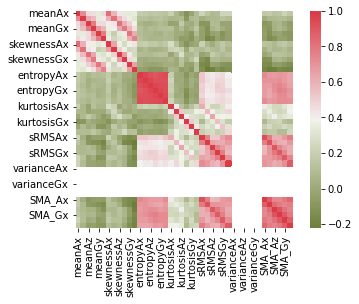

In [ ]:
import seaborn as sns
corr = dfCal.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.int), cmap=sns.diverging_palette(100, 10, as_cmap=True), square=True)

**Before classification, we need to split the datset into test and training parts**

In [ ]:
ds = pd.DataFrame.copy(dfCal)
x = ds.drop('exName',axis=1)
y = ds.exName

In [ ]:
# from sklearn.model_selection import train_test_split
# # x_test, y_test  = train_test_split(x,y,test_size=0.8)
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# # print('size of test dataset = {},'.format(len(x_test)))

**Now, we are ready to apply RF**

In [ ]:
# from sklearn import ensemble
# ds_rf = ensemble.RandomForestClassifier()
# ds_rf.fit(x_train,y_train)
# ACC_train_rf = ds_rf.score(x_train,y_train)
# ACC_test_rf  = ds_rf.score(x_test,y_test)

# print(ACC_train_rf )
# print(ACC_test_rf)



In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
y = ds['exName']
x = ds.drop({'exName'}, axis=1)
# scaler = preprocessing.StandardScaler(with_mean=False)
# x = scaler.fit_transform(x)
# sm = SMOTE(random_state=27)
# x,y= sm.fit_sample(x,y)

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

Accuracy =  75.0
Precision =  75.0
Recall =  75.0
F1_score=  75.0


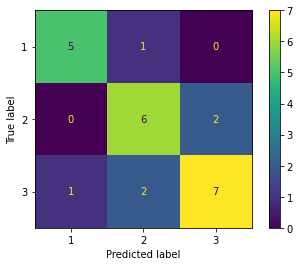

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       0.67      0.75      0.71         8
           3       0.78      0.70      0.74        10

    accuracy                           0.75        24
   macro avg       0.76      0.76      0.76        24
weighted avg       0.75      0.75      0.75        24



In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
estimator.fit(x_train,y_train)
pred=estimator.predict(x_test)
Accuracy= accuracy_score(y_test, pred)*100
Precision = precision_score(y_test, pred, average='micro')*100
Recall= recall_score(y_test, pred,average='micro')*100
F1_score= f1_score(y_test, pred, average='micro')*100
print('Accuracy = ', Accuracy)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1_score= ', F1_score)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,pred ) 
print(classification_report_actual )

In [ ]:
dump(estimator,'/content/drive/MyDrive/Colab Notebooks/Output/data/RFC2.joblib')

['/content/drive/MyDrive/Colab Notebooks/Output/data/RFC2.joblib']

## Export Model

In [ ]:
# pred_data="1,9.845188284518828,8.594142259414227,2.4728033472803346,1.405857740585774,4.405857740585774,10.510460251046025,10.327748430717838,8.0180045079288,7.441454978837749,7.754168305689156,6.115209273854442,10.630371549603591,2.8193765743297807,3.0236752024894242,2.853963981843955,3.1028227989781465,3.145152395657917,2.773626229868499,115.61631508566559,71.40530093032677,84.40393525915763,85.88552809224879,54.62600024064649,117.79084637893943,78.71496697010424,75.79155515382953,59.714978532089134,60.952413018023044,62.699088767043285,102.98600465505842,18.650721820550256,21.0416277741519,20.93310644723597,21.047467522305446,22.22418886533404,21.5897597963179,3265.0,3846.0,3393.0,3592.0,3997.0,3636.0"
# pred_data="2,4.054393305439331,8.594142259414227,-3.225941422594142,-1.782426778242678,8.594142259414227,1.5690376569037656,13.421225940150967,8.583556657333316,8.594142259414227,-1.5805634961331965,-10.710646836808522,5.274877275024346,2.3550092357882257,2.290370257319028,2.422855040041899,2.640343500181351,2.599919827076225,2.5779732184712327,198.09042220869847,119.42299366098479,12.469129256104907,9.967671994306883,146.18584490589097,106.96032701196981,56.29758795935969,30.913362535699644,20.21422921512236,23.044617447582837,55.57775660539657,71.01202090470818,18.650721820550256,21.0416277741519,20.93310644723597,21.047467522305446,22.22418886533404,21.5897597963179,2209.0,1723.0,1737.0,2090.0,3198.0,3617.0"
# Ex3 img
pred_data="3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0"
# pred_data="2,-0.4560669456066946,-3.3347280334728033,-3.213389121338912,-6.347280334728033,-0.4560669456066946,-0.029288702928870293,8.212887388557954,-1.250238762078528,-4.597847188244983,-9.089859455498447,4.684975263646601,7.058826048600503,2.5765418144117396,2.727989499678518,2.819975135163131,2.828922515978488,2.654231142101784,2.6558972527498383,110.11701462392028,7.769505137156991,45.02891027928918,111.10078442420803,108.34342951836366,113.36152421243821,37.06677227240808,25.409038684332877,37.45602721719693,58.07133832389291,71.7382795523985,55.645132340017625,18.650721820550256,21.0416277741519,20.93310644723597,21.047467522305446,22.22418886533404,21.5897597963179,2419.0,2423.0,3126.0,3689.0,3545.0,2981.0"
pred_data = pred_data.split(',')
pred_col = ['exName','meanAx','meanAy','meanAz','meanGx','meanGy','meanGz','skewnessAx','skewnessAy','skewnessAz','skewnessGx','skewnessGy','skewnessGz','entropyAx','entropyAy','entropyAz','entropyGx','entropyGy','entropyGz','kurtosisAx','kurtosisAy','kurtosisAz','kurtosisGx','kurtosisGy','kurtosisGz','sRMSAx','sRMSAy','sRMSAz','sRMSGx','sRMSGy','sRMSGz','varianceAx','varianceAy','varianceAz','varianceGx','varianceGy','varianceGz','SMA_Ax','SMA_Ay','SMA_Az','SMA_Gx','SMA_Gy','SMA_Gz']
z = {pred_col[0]:pred_data[0],pred_col[1]:pred_data[1],pred_col[2]:pred_data[2],pred_col[3]:pred_data[3],pred_col[4]:pred_data[4],pred_col[5]:pred_data[5],pred_col[6]:pred_data[6],pred_col[7]:pred_data[7],pred_col[8]:pred_data[8],pred_col[9]:pred_data[9],pred_col[10]:pred_data[10],pred_col[11]:pred_data[11],pred_col[12]:pred_data[12],pred_col[13]:pred_data[13],pred_col[14]:pred_data[14],pred_col[15]:pred_data[15],pred_col[16]:pred_data[16],pred_col[17]:pred_data[17],pred_col[18]:pred_data[18],pred_col[19]:pred_data[19],pred_col[20]:pred_data[20],pred_col[21]:pred_data[21],pred_col[22]:pred_data[22],pred_col[23]:pred_data[23],
     pred_col[24]:pred_data[24],pred_col[25]:pred_data[25],pred_col[26]:pred_data[26],pred_col[27]:pred_data[27],
     pred_col[28]:pred_data[28],pred_col[29]:pred_data[29],pred_col[30]:pred_data[30],pred_col[31]:pred_data[31],
     pred_col[32]:pred_data[32],pred_col[33]:pred_data[33],pred_col[34]:pred_data[34],pred_col[35]:pred_data[35],
     pred_col[36]:pred_data[36],pred_col[37]:pred_data[37],pred_col[38]:pred_data[38],pred_col[39]:pred_data[39],
     pred_col[40]:pred_data[40],pred_col[41]:pred_data[41],pred_col[42]:pred_data[42]}
   
k = pd.DataFrame(z,index = [0])
k['meanAx'] = k['meanAx'].astype(float)
k['meanAy'] = k['meanAy'].astype(float)
k['meanAz'] = k['meanAz'].astype(float)
k['meanGx'] = k['meanGx'].astype(float)
k['meanGy'] = k['meanGy'].astype(float)
k['meanGz'] = k['meanGz'].astype(float)
k['skewnessAx'] = k['skewnessAx'].astype(float)
k['skewnessAy'] = k['skewnessAy'].astype(float)
k['skewnessAz'] = k['skewnessAz'].astype(float)
k['skewnessGx'] = k['skewnessGx'].astype(float)
k['skewnessGy'] = k['skewnessGy'].astype(float)
k['skewnessGz'] = k['skewnessGz'].astype(float)
k['entropyAx'] = k['entropyAx'].astype(float)
k['entropyAy'] = k['entropyAy'].astype(float)
k['entropyAz'] = k['entropyAz'].astype(float)
k['entropyGx'] = k['entropyGx'].astype(float)
k['entropyGy'] = k['entropyGy'].astype(float)
k['entropyGz'] = k['entropyGz'].astype(float)
k['kurtosisAx'] = k['kurtosisAx'].astype(float)
k['kurtosisAy'] = k['kurtosisAy'].astype(float)
k['kurtosisAz'] = k['kurtosisAz'].astype(float)
k['kurtosisGx'] = k['kurtosisGx'].astype(float)
k['kurtosisGy'] = k['kurtosisGy'].astype(float)
k['kurtosisGz'] = k['kurtosisGz'].astype(float)
k['sRMSAx'] = k['sRMSAx'].astype(float)
k['sRMSAy'] = k['sRMSAy'].astype(float)
k['sRMSAz'] = k['sRMSAz'].astype(float)
k['sRMSGx'] = k['sRMSGx'].astype(float)
k['sRMSGy'] = k['sRMSGy'].astype(float)
k['sRMSGz'] = k['sRMSGz'].astype(float)
k['varianceAx'] = k['varianceAx'].astype(float)
k['varianceAy'] = k['varianceAy'].astype(float)
k['varianceAz'] = k['varianceAz'].astype(float)
k['varianceGx'] = k['varianceGx'].astype(float)
k['varianceGy'] = k['varianceGy'].astype(float)
k['varianceGz'] = k['varianceGz'].astype(float)
k['SMA_Ax'] = k['SMA_Ax'].astype(float)
k['SMA_Ay'] = k['SMA_Ay'].astype(float)
k['SMA_Az'] = k['SMA_Az'].astype(float)
k['SMA_Gx'] = k['SMA_Gx'].astype(float)
k['SMA_Gy'] = k['SMA_Gy'].astype(float)
k['SMA_Gz'] = k['SMA_Gz'].astype(float)

# k
s = k[k.columns.difference(['exName'])]
k = s.copy()
# k

clf = load('/content/drive/MyDrive/Colab Notebooks/Output/data/RFC2.joblib') 
predction = clf.predict(k)
# predction[0]
# predction
if predction[0] == '1':
  print("Ex1")
elif predction[0] == '2':
  print("Ex2")
elif predction[0] == '3':
  print("Ex3")  
elif predction[0] == '4':
  print("Ex4")

   

Ex3
